# K-MEANS
K均值算法是一个迭代过程，它不断地细化细化均值，直到均值收敛
令 ${z_1,z_2,...,z_q}$ 是向量观测集合。

在图像分割中，向量$z$的每一个分量表示一个数值像素属性。例如，诺分割只基于灰度尺度灰度值，则$z = $z 是一个表示灰度的标量。如果我们正在分割RGB彩色图像，那么$z$通常是一个三维向量。k均值聚类的目的是将观测集合Q划分为k个满足如下最优准则的不相交的聚类集合 $C= {C_1,C_2,...,C_k}$:
$$
    argmin_c [\sum_{i=1}^{k}\sum_{z=C_i}||z-m_i||^2]
$$
式中$m_i$是集合$C_i$中样本的均值向量，$||arg||$是参数的向量范数。通常使用欧几里德范数。这个公式说，我们感兴趣的是找到集合$C$，集合中的每个点到该集合的均值距离之和最小的。

遗憾的是，求这个极小值是一个NP困难问题，因为这个问题实际上无解。

于是这些年来人们提出了一些启发式方法，以便试图找到一些极小的近似

这一算法如下：

1. 初始化：规定一组初始均值$m_i , i=1,2,3...,k$ 

2. 将样本分配给聚类：将每个样本分配给均值最接近的聚类集合（关系被任意求解，但样本只分配给一个聚类）：
    $z_q\rightarrow C_i$  如果$||z_q - m_i||^2 < ||z_q - m_j||^2$,$j=1,2,...k (j\neq i)$

3. 更新聚类中心(均值)：
$$
    m_i = \frac{1}{|C_i|}\sum_{z=C_i},i=1,2,...k
$$

4.完备性验证：计算当前步骤和前几步中平均向量之间的欧几里德范数。计算残差$E$，即K个范数之和。诺$E\le T$,其中T是一个规定非负阈值，则停止。否则回到步骤2

In [82]:
import numpy as np 
import matplotlib.pyplot as plt

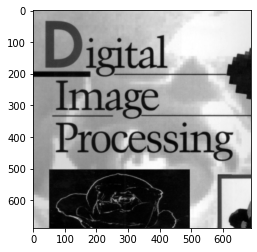

In [83]:
f = plt.imread("./../images/book-cover.tif")
plt.imshow(f, "gray")

In [84]:
def k_means(f,k,cluster = None , iter_c = 20):
    print("iter_c" , iter_c)   
    h,w = f.shape 
    _f = f.reshape(h*w).astype(np.float32)
    if cluster is None : 
        cluster = np.zeros(k , dtype="float32")       # 初始化       
        cluster_init_index = np.random.randint(len(_f),size=k)
        cluster = _f[cluster_init_index]
    print("cluster" , cluster)
    cluster_count = np.zeros(k) + 1
    for i in range(len(_f)):
      value = _f[i]
      min_dist = None 
      min_cluster_index = None
      for ki in range(k):
          mean = cluster[ki]
          if min_dist is None :
              min_cluster_index = ki 
              min_dist = abs(mean - value)
          else : 
              dist = abs( mean - value)
              if min_dist > dist : 
                  min_cluster_index = ki 
                  min_dist = dist
      count  = cluster_count[min_cluster_index]
      # Update mean 
      cluster[min_cluster_index] = (cluster[min_cluster_index] * count + value) / (count + 1)
      cluster_count[min_cluster_index] = cluster_count[min_cluster_index] + 1
    print("cluster_count",cluster_count)
    if iter_c > 0 :
        return k_means(f, k , cluster , iter_c = iter_c - 1)
    offset = int (255 / k)
    print("cluster" , cluster)
    cluster = np.sort(cluster)    
    g = np.zeros((h , w))
    for k in range(len(cluster)):
        mean = cluster[k]
        if k==0:
            g[f<mean] = offset * k 
        else :
            prev_mean = cluster[k-1]
            g[(f>prev_mean) & (f<=mean)] = offset * k 
    return g

iter_c 10
cluster [157. 209. 167. 233. 216.  12. 239. 202.]
cluster_count [113964.  24022.  66513.  31266.  19987. 143726.  39355.  34519.]
iter_c 9
cluster [151.92152  206.46571  174.46748  232.36584  218.24643   24.578669
 244.71436  190.45404 ]
cluster_count [ 91074.  23571.  66490.  31232.  28868. 143107.  46255.  42755.]
iter_c 8
cluster [148.27597  197.46555  168.97029  229.21649  212.07181   24.257421
 243.5327   183.17001 ]
cluster_count [ 20591.  30025. 118222.  31005.  30783. 137222.  49308.  56196.]
iter_c 7
cluster [109.80693 193.18454 158.19365 227.72006 210.07184  21.64134 243.00935
 177.95572]
cluster_count [ 35095.  31287. 119343.  30375.  29938. 113753.  52305.  61256.]
iter_c 6
cluster [ 72.56057  192.11986  155.3199   226.2704   209.05276   13.388576
 242.50348  176.48659 ]
cluster_count [ 34699.  42390.  96927.  30577.  31784. 113642.  57081.  66252.]
iter_c 5
cluster [ 71.87082  186.91725  152.372    223.40265  205.83926   13.357707
 241.72092  171.5818  ]
cluster_

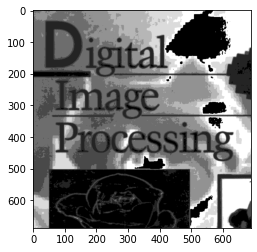

In [85]:
g = k_means(f , 8 , iter_c = 10)
plt.imshow(g , "gray")